<a href="https://colab.research.google.com/github/Pradip240/IPL-T20-Cricket-Analysis/blob/main/Hrithik__IPL_T20_Cricket_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

In [1]:
#import packages

import pandas as pd
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Input file path 
path = '/content/drive/MyDrive/Alma Better Cohort Nilgiri/Capstone Project/Exploratory Data Analysis Capstone Project/IPL T20 Cricket Analysis/IPL Data/'
# individual data frame
players_df = pd.read_excel(path + 'Players.xlsx')
deliveries_df = pd.read_csv(path + 'deliveries.csv')
most_runs_average_strikerate_df = pd.read_csv(path + 'most_runs_average_strikerate.csv')
teamwise_home_and_away_df = pd.read_csv(path + 'teamwise_home_and_away.csv')

In [4]:
teamwise_home_and_away_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 14 non-null     object 
 1   home_wins            14 non-null     int64  
 2   away_wins            14 non-null     int64  
 3   home_matches         14 non-null     int64  
 4   away_matches         14 non-null     int64  
 5   home_win_percentage  14 non-null     float64
 6   away_win_percentage  14 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes


In [5]:
teamwise_home_and_away_df.describe()

,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,23.928571,29.428571,53.500000,53.500000,41.737663,55.574283
std,18.685512,20.816836,35.821674,35.883894,14.095272,13.669679
min,1.000000,4.000000,6.000000,7.000000,7.142857,23.076923
25%,5.250000,8.000000,15.500000,18.500000,36.282631,51.625387
50%,27.000000,35.000000,65.000000,60.000000,41.809353,58.401163
75%,34.750000,48.250000,84.500000,85.750000,49.404762,62.430556
max,58.000000,58.000000,101.000000,95.000000,62.500000,75.000000


In [6]:
teamwise_home_and_away_df.head(14)

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In [7]:
team = teamwise_home_and_away_df['team'].loc[0:13]

In [8]:
team

0          Rising Pune Supergiant
1                  Mumbai Indians
2             Chennai Super Kings
3                  Delhi Capitals
4             Sunrisers Hyderabad
5                Rajasthan Royals
6                 Deccan Chargers
7                 Kings XI Punjab
8     Royal Challengers Bangalore
9           Kolkata Knight Riders
10               Delhi Daredevils
11                  Pune Warriors
12           Kochi Tuskers Kerala
13                  Gujarat Lions
Name: team, dtype: object

In [9]:
length_of_team = np.array(len(team))

In [10]:
length_of_team

array(14)

In [11]:
home_wins_of_team = teamwise_home_and_away_df['home_wins']

In [12]:
home_wins_of_team

0      5
1     58
2     51
3      3
4     30
5     29
6     18
7     38
8     35
9     34
10    25
11     6
12     2
13     1
Name: home_wins, dtype: int64

In [13]:
away_wins_of_team = teamwise_home_and_away_df['away_wins']

In [14]:
away_wins_of_team

0      5
1     51
2     49
3      7
4     28
5     46
6     11
7     44
8     49
9     58
10    42
11     6
12     4
13    12
Name: away_wins, dtype: int64

Text(0, 0.5, 'Wins at Home & Away')

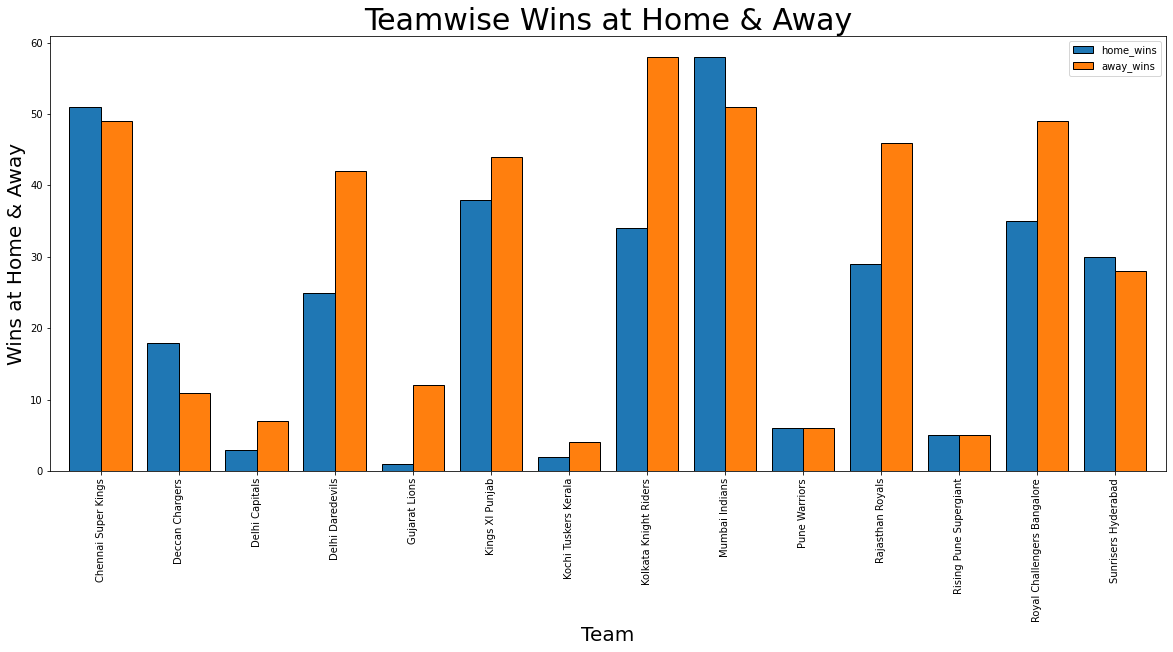

In [15]:
# Create the figure object 
qw = teamwise_home_and_away_df.groupby(['team'])[['home_wins','away_wins']].mean().plot.bar(
    width=0.8,
    linewidth= 1,
    edgecolor='black',
    figsize = (20,8),
    fontsize = 10,
)
plt.yticks(ticks = [x for x in range(0,70,10)])
plt.xticks(rotation = 90)
qw.set_title("Teamwise Wins at Home & Away", fontsize = 30)

# Set x-labels
qw.set_xlabel("Team", fontsize = 20)
qw.set_ylabel("Wins at Home & Away", fontsize = 20)

#**MOST_RUNS_AVERAGE_STRIKERATE**

**MOST RUNS BY THE BATSMAN**

In [16]:
most_runs_average_strikerate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batsman        516 non-null    object 
 1   total_runs     516 non-null    int64  
 2   out            516 non-null    int64  
 3   numberofballs  516 non-null    int64  
 4   average        482 non-null    float64
 5   strikerate     516 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 24.3+ KB


In [17]:
most_runs_average_strikerate_df.describe()

,total_runs,out,numberofballs,average,strikerate
count,516.000000,516.000000,516.000000,482.000000,516.000000
mean,430.625969,17.063953,335.645349,16.355074,105.433442
std,882.275431,28.124511,663.593679,11.146222,39.633938
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,15.000000,2.000000,17.000000,8.000000,84.362069
50%,74.000000,5.500000,68.000000,14.607143,111.651584
75%,340.500000,18.000000,290.000000,23.657609,130.499036
max,5426.000000,161.000000,4111.000000,88.000000,250.000000


In [18]:
most_runs_average_strikerate_df.head(10)

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
5,CH Gayle,4525,110,2972,41.136364,152.254374
6,MS Dhoni,4450,118,3206,37.711864,138.802246
7,RV Uthappa,4420,156,3381,28.333333,130.730553
8,AB de Villiers,4414,104,2902,42.442308,152.101999
9,G Gambhir,4219,134,3400,31.485075,124.088235


In [19]:
most_runs_by_batsman = most_runs_average_strikerate_df["total_runs"].loc[:9]

In [20]:
most_runs_by_batsman

0    5426
1    5386
2    4902
3    4717
4    4601
5    4525
6    4450
7    4420
8    4414
9    4219
Name: total_runs, dtype: int64

In [21]:
mostruns_batsman_name = most_runs_average_strikerate_df["batsman"].loc[:9]

In [22]:
mostruns_batsman_name

0           V Kohli
1          SK Raina
2         RG Sharma
3         DA Warner
4          S Dhawan
5          CH Gayle
6          MS Dhoni
7        RV Uthappa
8    AB de Villiers
9         G Gambhir
Name: batsman, dtype: object

<BarContainer object of 10 artists>

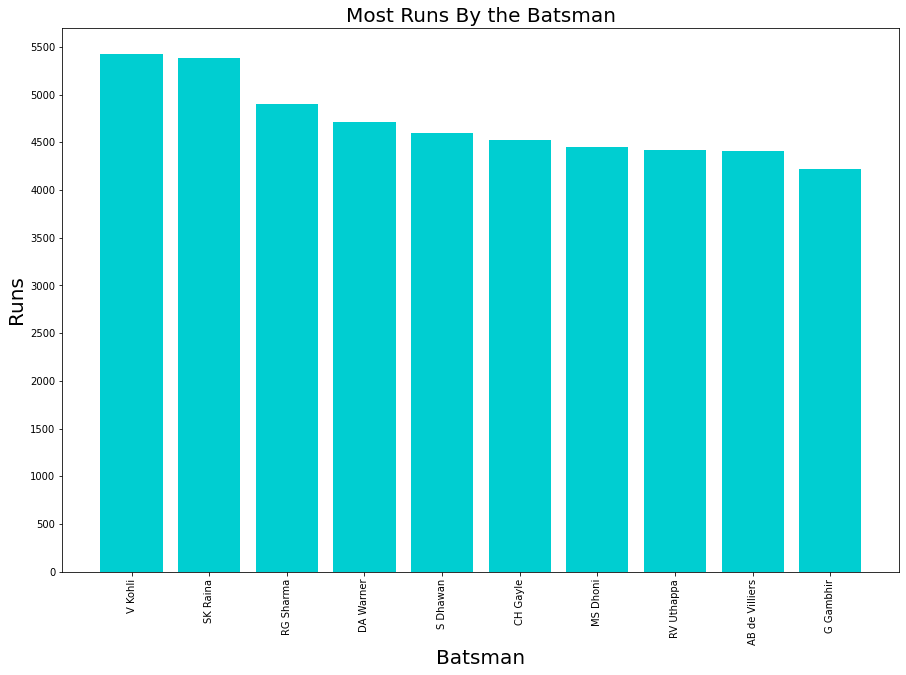

In [23]:
# Create the figure object(Most Runs By the Batsman)

plt.rcParams['figure.figsize'] = (15, 10)
plt.title("Most Runs By the Batsman",fontsize = 20)
plt.yticks(ticks = [x for x in range(0,6000,500)])
plt.xticks(rotation = 90)
plt.xlabel('Batsman',fontsize = 20)
plt.ylabel('Runs',fontsize = 20)
plt.bar(mostruns_batsman_name, most_runs_by_batsman, color='DARKTURQUOISE')

**AVERAGE OF THE BATSMAN**

In [24]:
batsman_average = pd.DataFrame(most_runs_average_strikerate_df.groupby(['batsman']).agg({'total_runs' : 'sum','out' : 'sum'}))
batsman_average["average"] = batsman_average['total_runs']/batsman_average['out']
batsman_average = batsman_average.sort_values(by = 'average',ascending = False)
batsman_average[batsman_average['total_runs'] > 2500]

,total_runs,out,average
batsman,,,
AB de Villiers,4414,104,42.442308
DA Warner,4717,114,41.377193
CH Gayle,4525,110,41.136364
MS Dhoni,4450,118,37.711864
V Kohli,5426,152,35.697368
SK Raina,5386,160,33.662500
S Dhawan,4601,137,33.583942
AM Rahane,3834,117,32.769231
G Gambhir,4219,134,31.485075


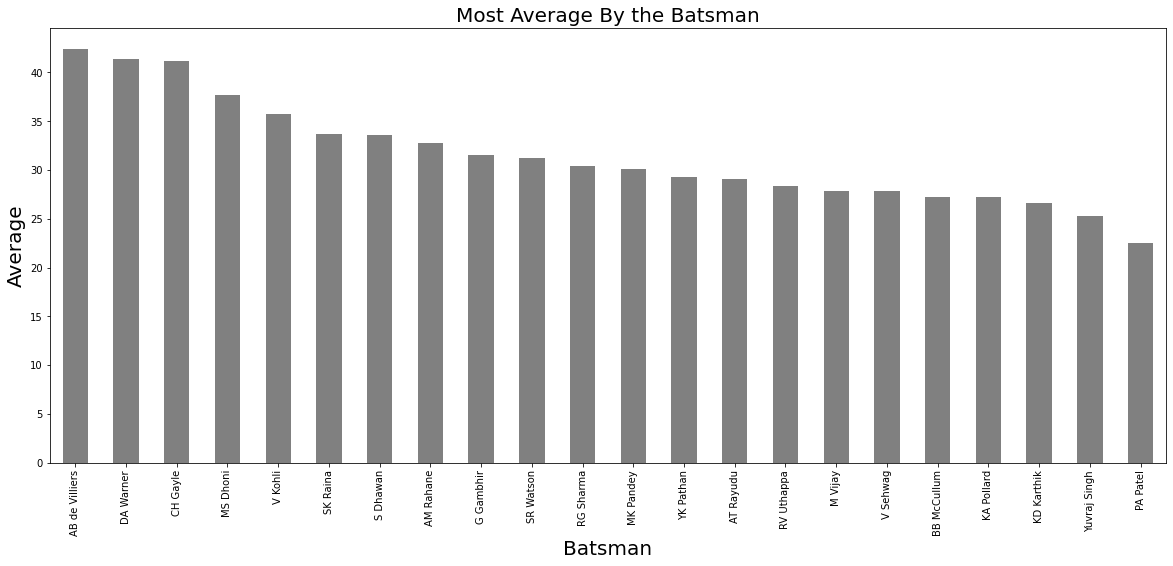

In [25]:
# Create the figure object(Most Average By the Batsman)

plt.rcParams['figure.figsize'] = 20,8
colors = (np.linspace(0,1,len(batsman_average[batsman_average['total_runs'] > 2500])))
batsman_average[batsman_average['total_runs'] > 2500].plot(kind = 'bar',y = "average", color = 'grey',legend = '',fontsize = 10)
plt.title("Most Average By the Batsman",fontsize = 20)
plt.xlabel('Batsman',fontsize = 20)
plt.ylabel('Average',fontsize = 20)
plt.show()

**MOST STRIKE RATE BY THE BATSMAN**

In [26]:
batsman_strikerate = pd.DataFrame(most_runs_average_strikerate_df.groupby(['batsman']).agg({'total_runs' : 'sum','numberofballs' : 'sum'}))
batsman_strikerate['strikerate'] = batsman_strikerate['total_runs']/batsman_strikerate['numberofballs']*100
batsman_strikerate = batsman_strikerate.sort_values(by ='strikerate' , ascending = False)
batsman_strikerate[batsman_strikerate['total_runs'] > 2500]
# We have taken runs greater then 2500 So that we take a significant amount of runs

,total_runs,numberofballs,strikerate
batsman,,,
V Sehwag,2728,1746,156.242841
CH Gayle,4525,2972,152.254374
AB de Villiers,4414,2902,152.101999
KA Pollard,2772,1879,147.525279
YK Pathan,3222,2240,143.839286
DA Warner,4717,3292,143.286756
SR Watson,3590,2566,139.906469
MS Dhoni,4450,3206,138.802246
SK Raina,5386,3916,137.538304


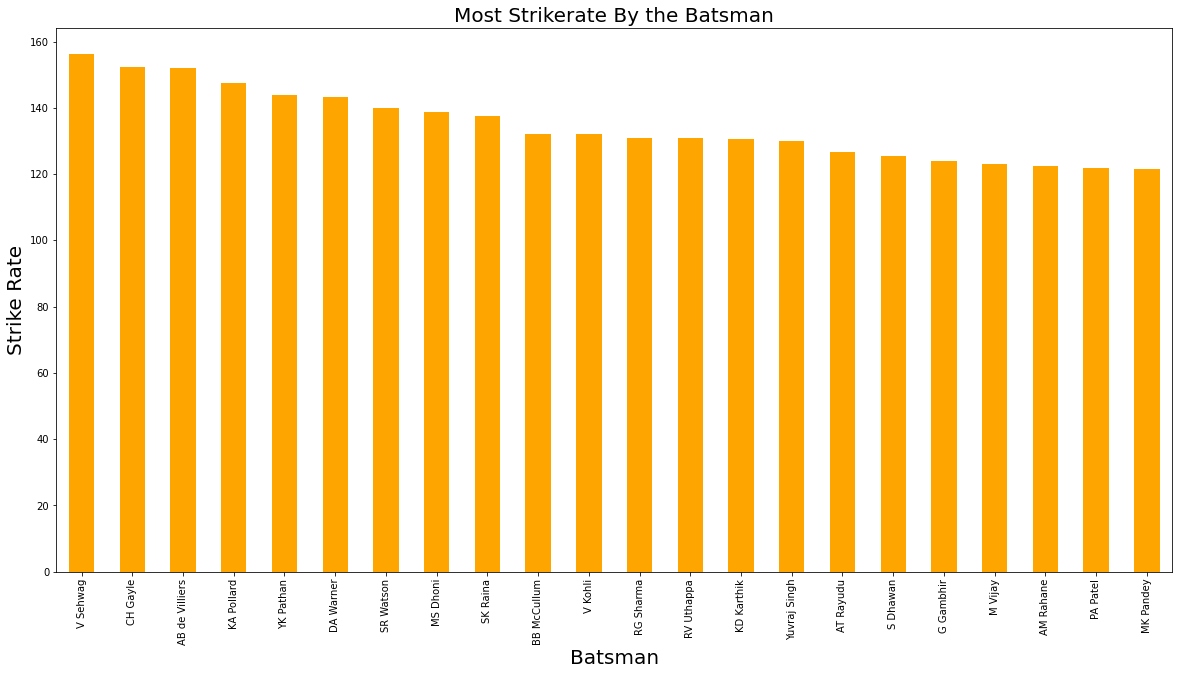

In [27]:
## Create the figure object(Most Strikerate By the Batsman)

plt.rcParams['figure.figsize'] = 20,10
colors = (np.linspace(0,1,len(batsman_strikerate[batsman_strikerate['total_runs'] > 2500])))
batsman_strikerate[batsman_strikerate['total_runs'] > 2500].plot(kind = 'bar',y = "strikerate", color = 'orange',legend = '',fontsize = 10)
plt.title("Most Strikerate By the Batsman",fontsize = 20)
plt.xlabel('Batsman',fontsize = 20)
plt.ylabel('Strike Rate',fontsize = 20)
plt.show()


#NUMBER OF WICKETS TAKEN BY THE BOWLER

**Bowling, in cricket, is the action of propelling the ball toward the wicket defended by a batsman. A player skilled at bowling is called a bowler; a bowler who is also a competent batsman is known as an all-rounder - Wikipedia**

**A bowler is said to have taken wickets for himself when the dismissal kinds are as follows:**
> caught

> bowled

> lbw

> caught and bowled

> stumped

**We need to create a new DataFrame say bowlers, and get the count of the above dismissal grouped by a player(bowler). Our target is to get all the bowlers who has taken 100 or more wickets.**

In [28]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [29]:
deliveries_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [30]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [31]:
bowlers = deliveries_df[['bowler','dismissal_kind']]
bowlers = bowlers[(bowlers.dismissal_kind.isin(['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped']))]
bowlers = bowlers.groupby('bowler').count().reset_index()
bowlers.rename(columns={'dismissal_kind':'no_of_wickets'}, inplace=True)
bowlers = bowlers.sort_values(by='no_of_wickets', ascending=False)
bowlers = bowlers[(bowlers.no_of_wickets>=100)]
bowlers

,bowler,no_of_wickets
290,SL Malinga,170
6,A Mishra,156
110,Harbhajan Singh,149
227,PP Chawla,149
82,DJ Bravo,147
46,B Kumar,133
232,R Ashwin,125
296,SP Narine,122
326,UT Yadav,119
244,RA Jadeja,108


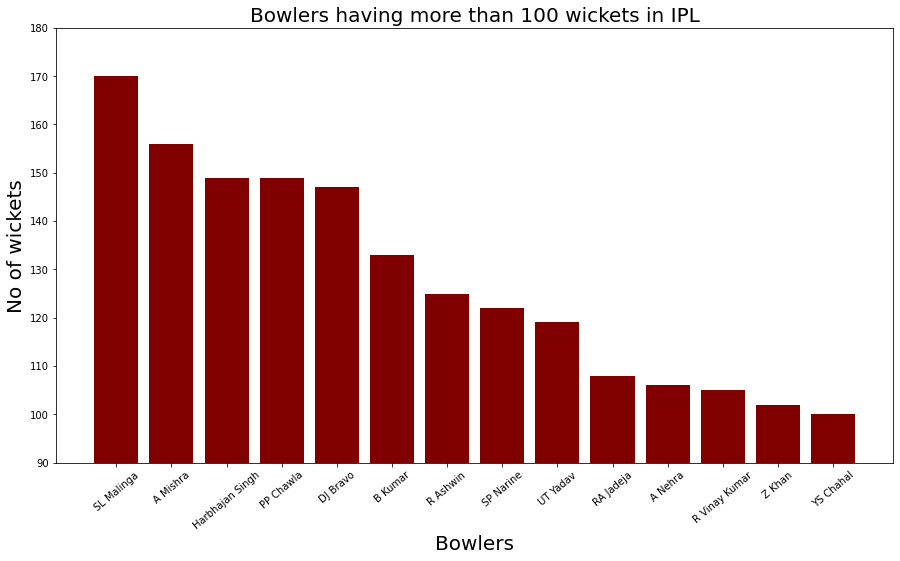

In [32]:
plt.figure(figsize=(15,8))
plt.bar(bowlers.bowler, bowlers.no_of_wickets, color = 'maroon')
plt.xticks(rotation=40)
plt.ylim(90,180)
plt.title('Bowlers having more than 100 wickets in IPL',fontsize = 20)
plt.xlabel('Bowlers',fontsize = 20)
plt.ylabel('No of wickets',fontsize = 20)
plt.show()

#Let's look at the batting and bowling styles of IPL Players

In [33]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Player_Name    566 non-null    object        
 1   DOB            471 non-null    datetime64[ns]
 2   Batting_Hand   563 non-null    object        
 3   Bowling_Skill  502 non-null    object        
 4   Country        471 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 22.2+ KB


In [34]:
players_df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
count,566,471,563,502,471
unique,566,457,3,16,11
top,P Amarnath,1987-04-30 00:00:00,Right_Hand,Right-arm medium,India
freq,1,3,373,107,264
first,NaN,1969-06-30 00:00:00,NaN,NaN,NaN
last,NaN,1998-07-18 00:00:00,NaN,NaN,NaN


In [35]:
players_df.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


#BATTING_HAND

In [36]:
Battinghand = players_df["Batting_Hand"]

In [37]:
Battinghand.describe()

count            563
unique             3
top       Right_Hand
freq             373
Name: Batting_Hand, dtype: object

In [38]:
players_df.replace(to_replace=' Right_Hand', value = 'Right_Hand', inplace=True)

In [39]:
players_df.replace(to_replace=' Left_hand bat', value = 'Left_Hand', inplace=True)

In [40]:
players_df.replace(to_replace='Right_hand', value = 'Right_Hand', inplace=True)

In [41]:
players_df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
count,566,471,563,502,471
unique,566,457,2,16,11
top,P Amarnath,1987-04-30 00:00:00,Right_Hand,Right-arm medium,India
freq,1,3,421,107,264
first,NaN,1969-06-30 00:00:00,NaN,NaN,NaN
last,NaN,1998-07-18 00:00:00,NaN,NaN,NaN


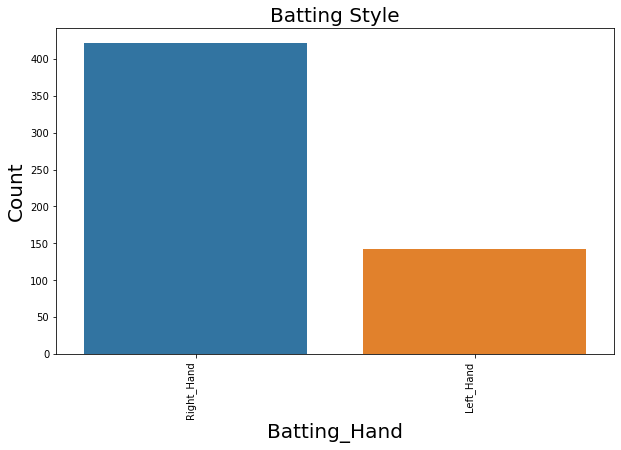

In [42]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='Batting_Hand', data=players_df, order=pd.value_counts(players_df['Batting_Hand']).iloc[:2].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Batting Style',fontsize = 20)
plt.xlabel('Batting_Hand',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

#BOWLING SKILL

In [43]:
Bowlingskill = players_df["Bowling_Skill"]

In [44]:
Bowlingskill.describe()

count                  502
unique                  16
top       Right-arm medium
freq                   107
Name: Bowling_Skill, dtype: object

In [45]:
Bowlingskill.unique()

array(['Right-arm medium', 'Right-arm offbreak', 'Left-arm fast-medium',
       'Right-arm fast-medium', nan, 'Right-arm fast', 'Legbreak googly',
       'Legbreak', 'Left-arm medium-fast', 'Slow left-arm orthodox',
       'Right-arm medium-fast', 'Left-arm medium', 'Left-arm fast',
       'Slow left-arm chinaman', 'Right-arm bowler', 'Right-arm Medium',
       'Right-arm Fast'], dtype=object)

In [49]:
players_df.replace(to_replace='Right-arm medium', value = 'Right-arm Medium', inplace=True)
players_df.replace(to_replace='Right-arm fast', value = 'Right-arm Fast', inplace=True)
players_df.replace(to_replace='Right-arm fast-medium', value = 'Right-arm medium-fast', inplace=True)
players_df.replace(to_replace='Left-arm fast-medium', value = 'Left-arm medium-fast', inplace=True)
players_df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """


,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
count,566,471,563,502,471
unique,566,457,2,12,11
top,P Amarnath,1987-04-30 00:00:00,Right_Hand,Right-arm Medium,India
freq,1,3,421,108,264
first,NaN,1969-06-30 00:00:00,NaN,NaN,NaN
last,NaN,1998-07-18 00:00:00,NaN,NaN,NaN


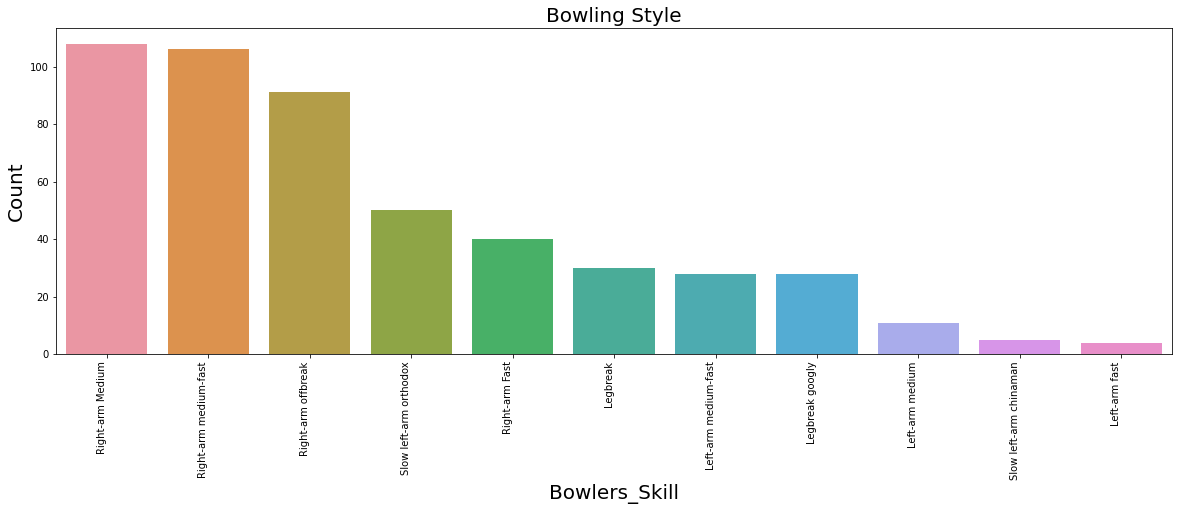

In [52]:
#Bowling skill Graph

plt.figure(figsize=(20,6))
ax=sns.countplot(x='Bowling_Skill', data=players_df, order=pd.value_counts(players_df['Bowling_Skill']).iloc[:11].index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Bowling Style',fontsize = 20)
plt.xlabel('Bowlers_Skill',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()